## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Loading the cleaned dataset

In [2]:
df = pd.read_csv('df_cleaned_2.csv')
X = df.drop(columns=['id'])
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.696,0.8090,-8.254,0.0500,0.2520,0.000128,0.2480,0.8570,132.962,131013
1,0.707,0.6810,-4.325,0.0668,0.0632,0.000005,0.0322,0.6460,117.999,200455
2,0.644,0.7350,-5.747,0.0391,0.0521,0.144000,0.1610,0.4180,88.980,153947
3,0.538,0.7420,-5.355,0.1140,0.1380,0.000047,0.0934,0.2500,96.107,272373
4,0.715,0.6200,-6.005,0.0484,0.4170,0.000000,0.0822,0.1720,97.950,221520
...,...,...,...,...,...,...,...,...,...,...
13084,0.261,0.0585,-22.054,0.0473,0.9870,0.872000,0.0887,0.1380,67.242,439213
13085,0.322,0.1290,-20.671,0.0437,0.9920,0.003620,0.1010,0.0449,129.018,260187
13086,0.311,0.1580,-16.724,0.0380,0.9690,0.901000,0.2400,0.1700,96.367,427653
13087,0.456,0.1090,-20.268,0.0604,0.9940,0.000266,0.0836,0.2400,68.848,201640


## Scaling features

In [3]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,13089.000000,1.308900e+04
mean,0.550586,0.607515,-9.643646,0.078745,0.301252,0.212770,0.182755,0.425704,120.675796,2.375420e+05
std,0.186284,0.288065,7.190513,0.084970,0.361625,0.345503,0.147440,0.257481,28.783260,1.237578e+05
min,0.000000,0.000568,-44.150000,0.000000,0.000001,0.000000,0.010400,0.000000,0.000000,1.740000e+04
25%,0.427000,0.436000,-10.890000,0.036900,0.011900,0.000001,0.094300,0.206000,98.996000,1.757500e+05
50%,0.565000,0.683000,-7.059000,0.047300,0.107000,0.000698,0.122000,0.405000,122.787000,2.102070e+05
75%,0.689000,0.842000,-5.073000,0.077200,0.559000,0.346000,0.225000,0.623000,137.987000,2.573570e+05
max,0.975000,1.000000,1.511000,0.960000,0.996000,0.995000,0.985000,0.985000,219.446000,4.170227e+06


In [4]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013
1,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
2,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
3,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,272373
4,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.780636,0.699469,0.193268,-0.338313,-0.136201,-0.615478,0.442539,1.675119,0.426869,-0.860819
1,0.839688,0.255107,0.739704,-0.140589,-0.658310,-0.615834,-1.021164,0.855611,-0.093002,-0.299685
2,0.501481,0.442572,0.541936,-0.466598,-0.689006,-0.199050,-0.147554,-0.029924,-1.101231,-0.675498
3,-0.067564,0.466873,0.596454,0.414922,-0.451457,-0.615714,-0.606064,-0.682423,-0.853612,0.281456
4,0.882635,0.043341,0.506054,-0.357144,0.320091,-0.615849,-0.682030,-0.985369,-0.789579,-0.129467


Now, all features will have the same weight.

## Chosing K

## Silouhette

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

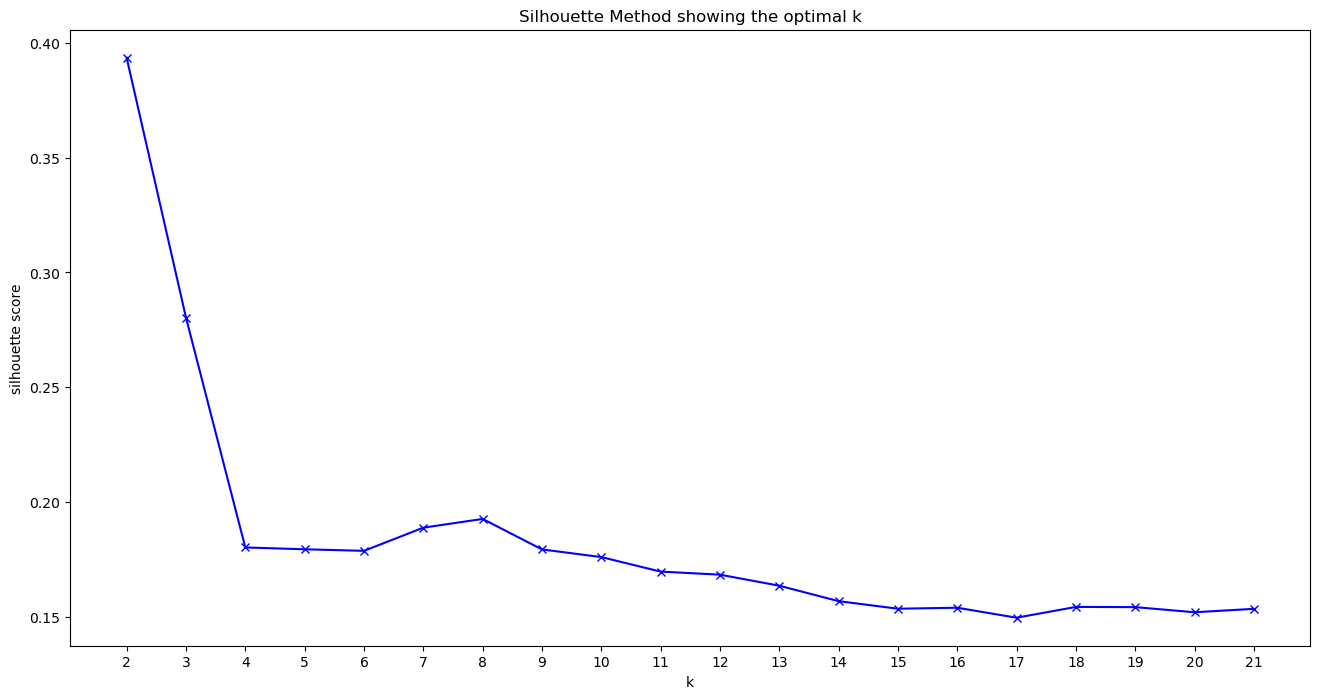

In [5]:
K = range(2, 22)
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

## Clustering the songs with K-Means

In [6]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

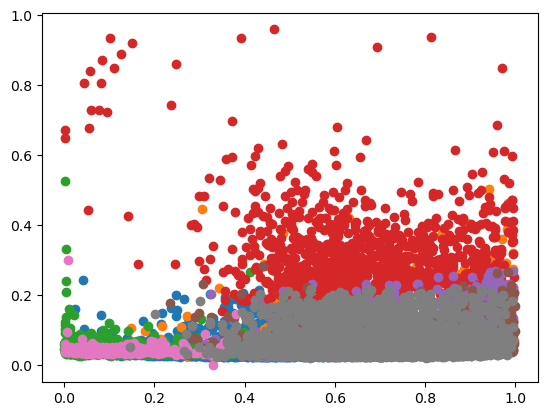

In [7]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

Now we have our "model", let's get the clusters and how many observations has each cluster.

In [8]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1663
1     844
2    1686
3     906
4    2895
5    1335
6     382
7    3378
dtype: int64

after checking, it appears that cat.6 is spoken word content while cat.7 is mostly live concerts

Now let's see to which group was assigned every song.

In [9]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters

## Now adding back the ID column

In [10]:
X["id"] = df.id

In [11]:
# R&B but also weird ballads
X[X['cluster'] == 6]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
4818,0.120,0.8700,-6.984,0.0995,0.0018,0.815,0.0834,0.0536,179.815,950210,6,0y15BMv8TXeAUsDhWIGQFl
7923,0.114,0.2580,-14.626,0.0345,0.8070,0.803,0.1800,0.0733,89.151,530894,6,5i0EqAX50KcKNgMDMHZndM
7964,0.452,0.1730,-24.666,0.0354,0.9630,0.894,0.0709,0.0722,157.801,1622576,6,7Gb3UUUaX0A46FJUgXxily
9914,0.631,0.8600,-9.606,0.0542,0.1240,0.795,0.1130,0.0266,124.994,913920,6,17WOCrqWH5HKgz0sAn7My6
10751,0.867,0.3820,-13.842,0.1460,0.6300,0.489,0.0459,0.7120,121.545,721733,6,6N3qWKVTqM7BvpBp9JVd7i
...,...,...,...,...,...,...,...,...,...,...,...,...
13072,0.358,0.1570,-20.319,0.0482,0.9430,0.526,0.0735,0.2500,120.551,801000,6,7iqtk0DuSB3McFvAs6WQgp
13078,0.292,0.1130,-20.097,0.0392,0.9780,0.504,0.1080,0.1540,112.857,478547,6,5Nxjc7qVeZTcNv7lCNTiSS
13079,0.255,0.0588,-23.945,0.0430,0.9940,0.888,0.1220,0.0385,80.698,738560,6,3VwB9QamFLmYcBTm7bNKOE
13080,0.220,0.2170,-16.705,0.0366,0.8900,0.851,0.0942,0.1340,141.736,773000,6,5OQl6PCd6FxO7qfz6tMVGq


## Playing with the parameters

**init**: those are the different initialization strategies. By default, sklearn is already using a 'smart' method, not the totally random one we saw.

**n_init**: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.

[Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How does Scikit-Learn know which model is the best? It uses a performance metric called **inertia**. **It is the mean squared distance between each instance and its closest centroid**. It's stored in the inertia_ attribute of the model.

In [12]:
kmeans.inertia_

53418.41259455405

**max_iter**: It iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

**tol**: This is a way to determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

**algorithm**: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

For learning purposes, we will tweak the parameters to replicate the good ol' K-Means - a bit dumber than the Scikit-Learn, yes, but also the original.

In [ ]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=4,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

There seems to be an elbow at **k=3**, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involve having a k between 5 and 8?

There is another metric that will help us decide.

<b> advanced (optional)

In [ ]:
##conda install -c districtdatalabs yellowbrick

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Here, we confirm that 3 is the best option, but we also notice that 5 a quite good - it meets the 'technical criteria' of having a better score than its predecessor (4), so if it falls within the range of our business demands - it looks like the best candidate.

# Saving with pickle

In [ ]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [ ]:
scaler2 = load("Model/scaler.pickle")

In [ ]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song 

# Time to work!

Time to clusterize the songs in your database and see how they look like. 